#### A pesquisa foi feita usando 10 carrinhos reais que ja foram comprados, sorteados randomicamente, mas com cotas de quantidades de produtos, para garantir que ele funciona em todas as situações. A partir disso avaliamos internamente se as recomendações eram: boas(2p), nem boa nem ruim(1p) ou ruins(0p).

In [93]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("dados_pesquisa1.csv", sep=',')

df.head(3)

,carrinho,id_produtos,desc_produtos,primeira_rec,segunda_rec,terceira_rec,P11,P21,P31,P12,...,P33,P14,P24,P34,P15,P25,P35,P16,P26,P36
0,1938144,"[4060515261064, 4059807341744, 4059811961976, ...","['SHORT CB SH SL LEGINK/GRETWO/SHOCYA M', 'TOP...",MEIA CANO MEDIO 3 PARES BLACK/BLACK/BLACK M,LETRA AVULSA MULTCO NT,NR INT CLUB MULTCO NT,1,1,2,1,...,1,1,1,2,1,0,1,0,0,0
1,3491421,"[4064054469653, 4060507958217, 4060507958132, ...","['SHORTS D2M SEASONAL BLACK/WHITE L', 'BERMUDA...",BERMUDA 3 STRIPES BLACK L,KIT FRESCOBOL -2,BARALHO PERSONALIZADO PAPEL CARTAO 300 GR -2,0,0,2,1,...,2,1,0,2,0,0,1,2,1,1
2,3255963,"[4062065488564, 4062065434844, 4062055082451, ...","['MEIA FOLD CUFF CREW WHITE S', 'MEIA MID CUT ...",CALCA ORIGINALS MULTCO M,MEIA TRICOLOR THIN WHITE M,REGATA CORSET WHITE S,2,2,2,0,...,2,1,2,2,1,2,1,1,1,1


In [47]:
df['REC1'] = df['P11'] + df['P12'] + df['P13'] + df['P14'] + df['P15'] + df['P16']
df['REC2'] = df['P21'] + df['P22'] + df['P23'] + df['P24'] + df['P25'] + df['P26']
df['REC3'] = df['P31'] + df['P32'] + df['P33'] + df['P34'] + df['P35'] + df['P36']
df.head(3)

,carrinho,id_produtos,desc_produtos,primeira_rec,segunda_rec,terceira_rec,P11,P21,P31,P12,...,P34,P15,P25,P35,P16,P26,P36,REC1,REC2,REC3
0,1938144,"[4060515261064, 4059807341744, 4059811961976, ...","['SHORT CB SH SL LEGINK/GRETWO/SHOCYA M', 'TOP...",MEIA CANO MEDIO 3 PARES BLACK/BLACK/BLACK M,LETRA AVULSA MULTCO NT,NR INT CLUB MULTCO NT,1,1,2,1,...,2,1,0,1,0,0,0,5,4,7
1,3491421,"[4064054469653, 4060507958217, 4060507958132, ...","['SHORTS D2M SEASONAL BLACK/WHITE L', 'BERMUDA...",BERMUDA 3 STRIPES BLACK L,KIT FRESCOBOL -2,BARALHO PERSONALIZADO PAPEL CARTAO 300 GR -2,0,0,2,1,...,2,0,0,1,2,1,1,4,3,10
2,3255963,"[4062065488564, 4062065434844, 4062055082451, ...","['MEIA FOLD CUFF CREW WHITE S', 'MEIA MID CUT ...",CALCA ORIGINALS MULTCO M,MEIA TRICOLOR THIN WHITE M,REGATA CORSET WHITE S,2,2,2,0,...,2,1,2,1,1,1,1,7,10,10


In [140]:
print(df.iloc[0,1])
print(df.iloc[0,2])

[4060515261064, 4059807341744, 4059811961976, 4058027540555, 4060517697724, 4059807898163, 4059811765116, 4059322292132, 4060514204963, 4059807898170]
['SHORT CB SH SL LEGINK/GRETWO/SHOCYA M', 'TOP ASK SPT BRA F HIREOR/PRINT L', 'CHUTEIRA PREDATOR 18 4 IN JR CBLACK/FTWWHT/RED 32', 'alphabounce em m    CONAVY/FTWWHT/GREFIV CONAVY/FTWWHT/GREFIV 40', 'CAMISA INTER I ACTRED L', 'CALCA ASK SPT 34T F HIREOR/PRINT L', 'TENIS PROPHERE W TRAMAR/NOBMAR/SOLRED 39', 'MEIA ULT AN HC BLACK/WHITE 3739', 'CAMISETA AI BLACK M', 'CALCA ASK SPT 34T F HIREOR/PRINT M']


In [84]:
modelo_pesquisa = df.iloc[:10,6:24]
top_produtos = df.iloc[10:,6:24]

In [133]:
print(360)#pontos disponiveis na pesquisa
print(modelo_pesquisa.sum().sum())
print(top_produtos.sum().sum())

360
246
197


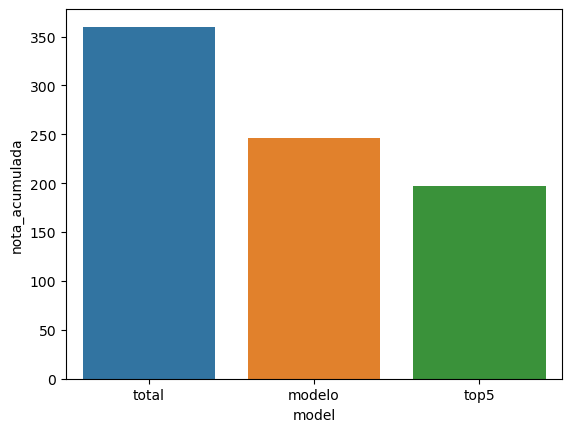

In [167]:
dados_sat = [[360, 'total'],[246,'modelo'],[197, 'top5']]

sat = pd.DataFrame(dados_sat, columns=['nota_acumulada', 'model'])

sns.barplot(data=sat, x="model", y="nota_acumulada")

plt.show()

In [139]:
print("Porcentagem de satisfação total do modelo: %.2f%%" % (246/(360/100)))
print("Porcentagem de satisfação total dos melhores produtos: %.2f%%" % (197/(360/100)))

Porcentagem de satisfação total do modelo: 68.33%
Porcentagem de satisfação total dos melhores produtos: 54.72%


In [145]:
modelo_rec = pd.DataFrame({'RECOMENDACAO':df.iloc[:10,24:].sum().index, 'PONTUACAO':df.iloc[:10,24:].sum().values})
modelo_rec

,RECOMENDACAO,PONTUACAO
0,REC1,88
1,REC2,77
2,REC3,81


In [146]:
top_produtos_rec = pd.DataFrame({'RECOMENDACAO':df.iloc[10:,24:].sum().index, 'PONTUACAO':df.iloc[10:,24:].sum().values})
top_produtos_rec

,RECOMENDACAO,PONTUACAO
0,REC1,87
1,REC2,27
2,REC3,83


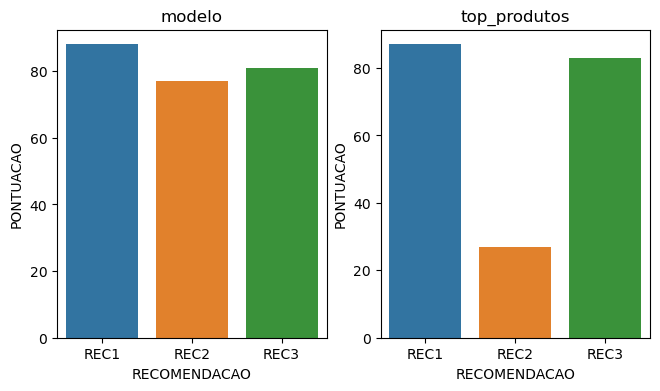

In [166]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.title("modelo")
sns.barplot(data=modelo_rec, x="RECOMENDACAO", y="PONTUACAO")
plt.subplot(142)
plt.title("top_produtos")
sns.barplot(data=top_produtos_rec, x="RECOMENDACAO", y="PONTUACAO")
plt.show()

In [190]:
print("modelo | top_produtos")
print((modelo_pesquisa == 0).astype(int).sum(axis=1).sum(), '    |', (top_produtos == 0).astype(int).sum(axis=1).sum())
print((modelo_pesquisa == 1).astype(int).sum(axis=1).sum(), '    |', (top_produtos == 1).astype(int).sum(axis=1).sum())
print((modelo_pesquisa == 2).astype(int).sum(axis=1).sum(), '    |', (top_produtos == 2).astype(int).sum(axis=1).sum())

modelo | top_produtos
29     | 58
56     | 47
95     | 75


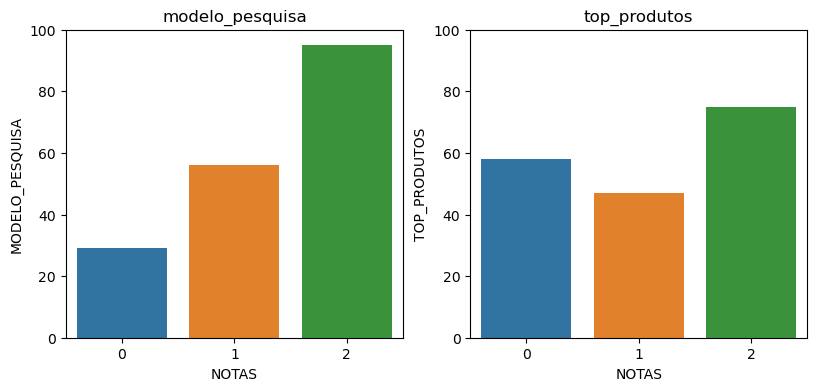

In [182]:
dados_picados = [[0, 29, 58],[1, 56, 47],[2, 95, 75]]

picados = pd.DataFrame(dados_picados, columns=['NOTAS', 'MODELO_PESQUISA', 'TOP_PRODUTOS'])
picados

plt.figure(figsize=(20,4))
plt.subplot(141)
plt.ylim(0, 100)
plt.title("modelo_pesquisa")
sns.barplot(data=picados, x="NOTAS", y="MODELO_PESQUISA")
plt.subplot(142)
plt.ylim(0, 100)
plt.title("top_produtos")
sns.barplot(data=picados, x="NOTAS", y="TOP_PRODUTOS")
plt.show()

### Desvantagens do modelo de produtos mais comprados, com a reincidência de compras o cliente não verá mais novidades do que comprar

In [201]:
people = pd.read_csv("people.csv")

In [205]:
print(people[people['quantidadePedidos'] == 1].shape[0])
print(people[people['quantidadePedidos'] > 1].shape[0])

373516
178688


In [209]:
print(people[people['quantidadePedidos'] == 1]['quantidadePedidos'].sum())
print(people[people['quantidadePedidos'] > 1]['quantidadePedidos'].sum())

373516
608221


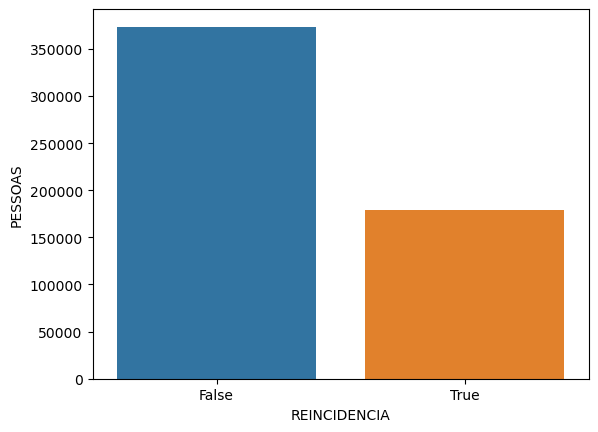

In [210]:
dados_pessoas = [[False, 373516, 373516],[True, 178688, 608221]]

pessoas = pd.DataFrame(dados_pessoas, columns=['REINCIDENCIA', 'PESSOAS', 'PEDIDOS'])

sns.barplot(data=pessoas, x="REINCIDENCIA", y="PESSOAS")

plt.show()

In [213]:
print("Porcentagem de clientes de 1 pedido apenas: %.2f%%" % (373516 / ((373516 + 178688)/100)))
print("Porcentagem de clientes com mais de 1 pedido: %.2f%%" % (178688 / ((373516 + 178688)/100)))

Porcentagem de clientes de 1 pedido apenas: 67.64%
Porcentagem de clientes com mais de 1 pedido: 32.36%


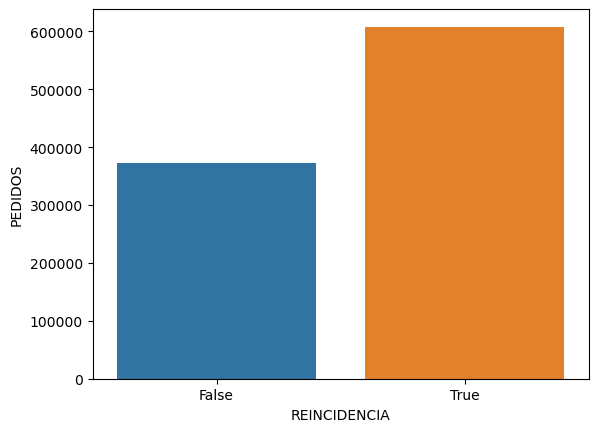

In [211]:
sns.barplot(data=pessoas, x="REINCIDENCIA", y="PEDIDOS")

plt.show()

In [214]:
print("Porcentagem de pedidos por clientes de 1 pedido apenas: %.2f%%" % (373516 / ((373516 + 608221)/100)))
print("Porcentagem de pedidos por clientes com mais de 1 pedido: %.2f%%" % (608221 / ((373516 + 608221)/100)))

Porcentagem de pedidos por clientes de 1 pedido apenas: 38.05%
Porcentagem de pedidos por clientes com mais de 1 pedido: 61.95%
